# Clustering of Documents:

### What this notebook does (as of now): 
Loads the text files from a corpus, preprocesses the files, breaks the books into small paragraphs or chunks. TF-IDF vectors have been calculated for each chunk. K Means clustering was performed based on these TF-IDF vectors. We started with K=10 and will try larger and smaller K's. 

We begin by importing libraries and modules that I will use in this section. 

In [1]:
import nltk
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
import random
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

### Loading the text and Pre-Processing.

A function to load a book given the folder and filename. 

In [3]:
def loadBook(folder,filename):
    filepath=folder + "/" + filename
    f=open(filepath)
    raw=f.read()
    return(raw)

Basic preprocessing of a book. Stemming needs to be added. 

In [4]:
def preProcess(book):
    book=book.strip()
    words=nltk.word_tokenize(book)
    words=[w.lower() for w in words if w not in stopwords.words('english')]
    words=[lemmatizer.lemmatize(w) for w in words if len(w)>1]
    return(words)

A function that converts a given book into smaller chunks. 

In [5]:
def createChunks(words,filename,text_list,id_list):
    i=0
    count=0
    while(i<len(words)):
        if((i+1000)<len(words)):
            chunk=words[i:i+1000]
            chunk=" ".join(chunk)
        else:
            chunk=words[i:len(words)]
            chunk=" ".join(chunk)
        i=i+1000
        count=count+1
        text_list.append(chunk)
        id_list.append(filename + "-" + str(count))
    return(text_list,id_list)

Loading Karl Marx's books into a list. 

In [6]:
marx_books=[]
marx_id=[]
folder="MarxText"

In [7]:
for file in os.listdir(folder):
    print(file)
    book=loadBook(folder,file)
    words=preProcess(book)
    createChunks(words,file,marx_books,marx_id)

CritiqueofHegel'sPhilosophyOfRight.txt
ThePovertyOfPhilosophy.txt
EconomicPhilosophicManuscripts.txt
TheGermanIdeology.txt
CapitalVol1.txt


Loading Hegel's books into a list. 

In [9]:
hegel_books=[]
hegel_id=[]
folder="HegelText"

In [10]:
for file in os.listdir(folder):
    print(file)
    book=loadBook(folder,file)
    words=preProcess(book)
    createChunks(words,file,hegel_books,hegel_id)

Philosophy of Mind.txt
Science of Logic.txt
Phenomenology of Mind.txt
Philosophy of Spirit.txt


In [11]:
len(hegel_id)

212

In [12]:
len(marx_id)

308

Combining both the lists into one large list.

In [13]:
books=marx_books+hegel_books
ids=marx_id+hegel_id

### TF-IDF calculation

Calculating the TF-IDF matrix using scikit learn's TfidfVectorizer. max_df=0.8 means that any word which is present in more than 80% of the documents will not be present in the final matrix.

In [13]:
tfidfVectorizer=TfidfVectorizer(max_df=0.8)
tfidfMatrix=tfidfVectorizer.fit_transform(books)
tfidfMatrix.shape

(520, 21910)

Calculate a distance matrix where distance between any two vectors is defined by 1-cosineSimilarity. 

In [14]:
dist = 1 - cosine_similarity(tfidfMatrix)
dist.shape

(520, 520)

### Clustering using K-Means

Clustering using K Means. We begin with 10 clusters.

In [15]:
num_of_clusters=10
kmeans=KMeans(n_clusters=num_of_clusters)
kmeans.fit(tfidfMatrix)
clusters=kmeans.labels_.tolist()

Converting to a Pandas Data Frame. 

In [16]:
documents = { 'title': ids,  'text': books, 'cluster': clusters }
documentFrame = pd.DataFrame(documents, index = [clusters])
documentFrame

,cluster,text,title
5,5,marxs critique hegels philosophy right 1843-...,CritiqueofHegel'sPhilosophyOfRight.txt-1
3,3,personal notion short long believed believe ju...,CritiqueofHegel'sPhilosophyOfRight.txt-2
5,5,war radical fact german history came grief the...,CritiqueofHegel'sPhilosophyOfRight.txt-3
5,5,critique hegel 's philosophy right society wit...,CritiqueofHegel'sPhilosophyOfRight.txt-4
5,5,way considering manner speaking there two-fold...,CritiqueofHegel'sPhilosophyOfRight.txt-5
5,5,element state nature real subject case politic...,CritiqueofHegel'sPhilosophyOfRight.txt-6
5,5,existing condition circumstance inasmuch actio...,CritiqueofHegel'sPhilosophyOfRight.txt-7
5,5,counsel actual arbitrary choice willkür in wor...,CritiqueofHegel'sPhilosophyOfRight.txt-8
5,5,arbitrary yet determinate decision sovereign p...,CritiqueofHegel'sPhilosophyOfRight.txt-9
5,5,rather two completely opposed concept sovereig...,CritiqueofHegel'sPhilosophyOfRight.txt-10


If we now want to visualize the clusters in a two dimensional plane, we would have to convert the distance matrix to a two dimensional array. This can be done using scikit learn's multi dimensional scaling. 

In [17]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=7)
transformed = mds.fit_transform(dist)
x=transformed[:, 0]
y=transformed[:, 1]

### Visualization with matplotlib

We first begin by generating as many colours as the number of clusters. And creating names for the clusters. 

In [18]:
num_colours=num_of_clusters
col=mpl.colors.cnames.items()
colours={}
random.seed(1)
i=0
while (i<num_of_clusters):
    c=random.choice(list(col))
    if(c[1] not in colours.keys()):
        colours[i]=c[1]
        i=i+1


cluster_names={}
for i in range(num_of_clusters):
    cluster_names[i]="Cluster-"+str(i)

Creating a data frame which we will use for plotting.

In [19]:
df = pd.DataFrame(dict(x=x, y=y, label=clusters, title=ids)) 
groups = df.groupby('label')

Plotting using matplotlib. 

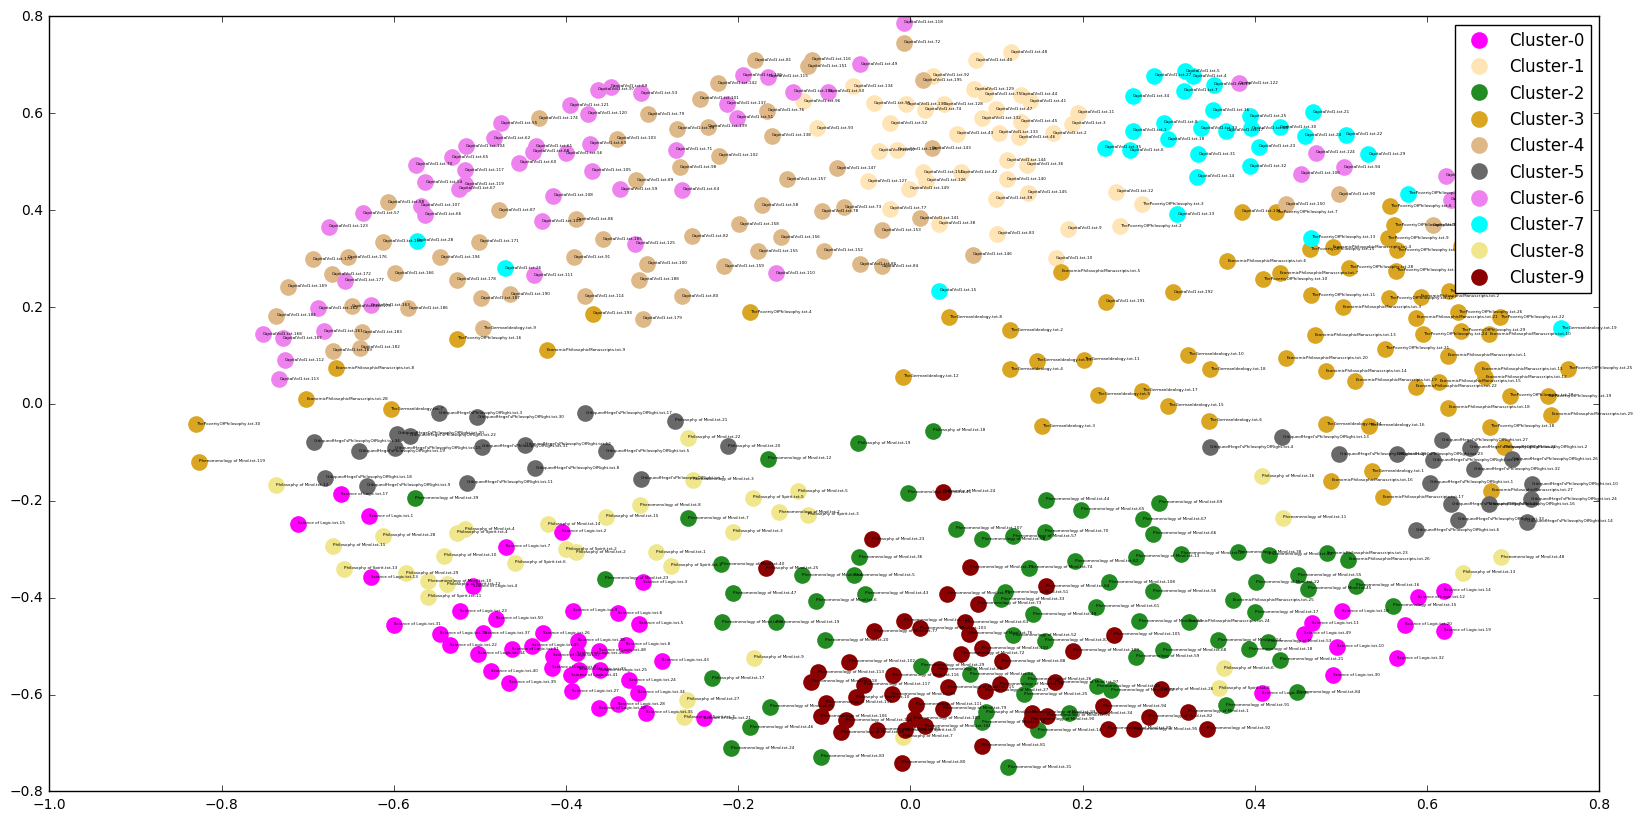

In [20]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10)) # set size
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=colours[name], 
            mec='none')
    
ax.legend(numpoints=1)  #show legend 

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=3)  


### Ward's Clustering

In [21]:
dist_matrix=ward(dist)

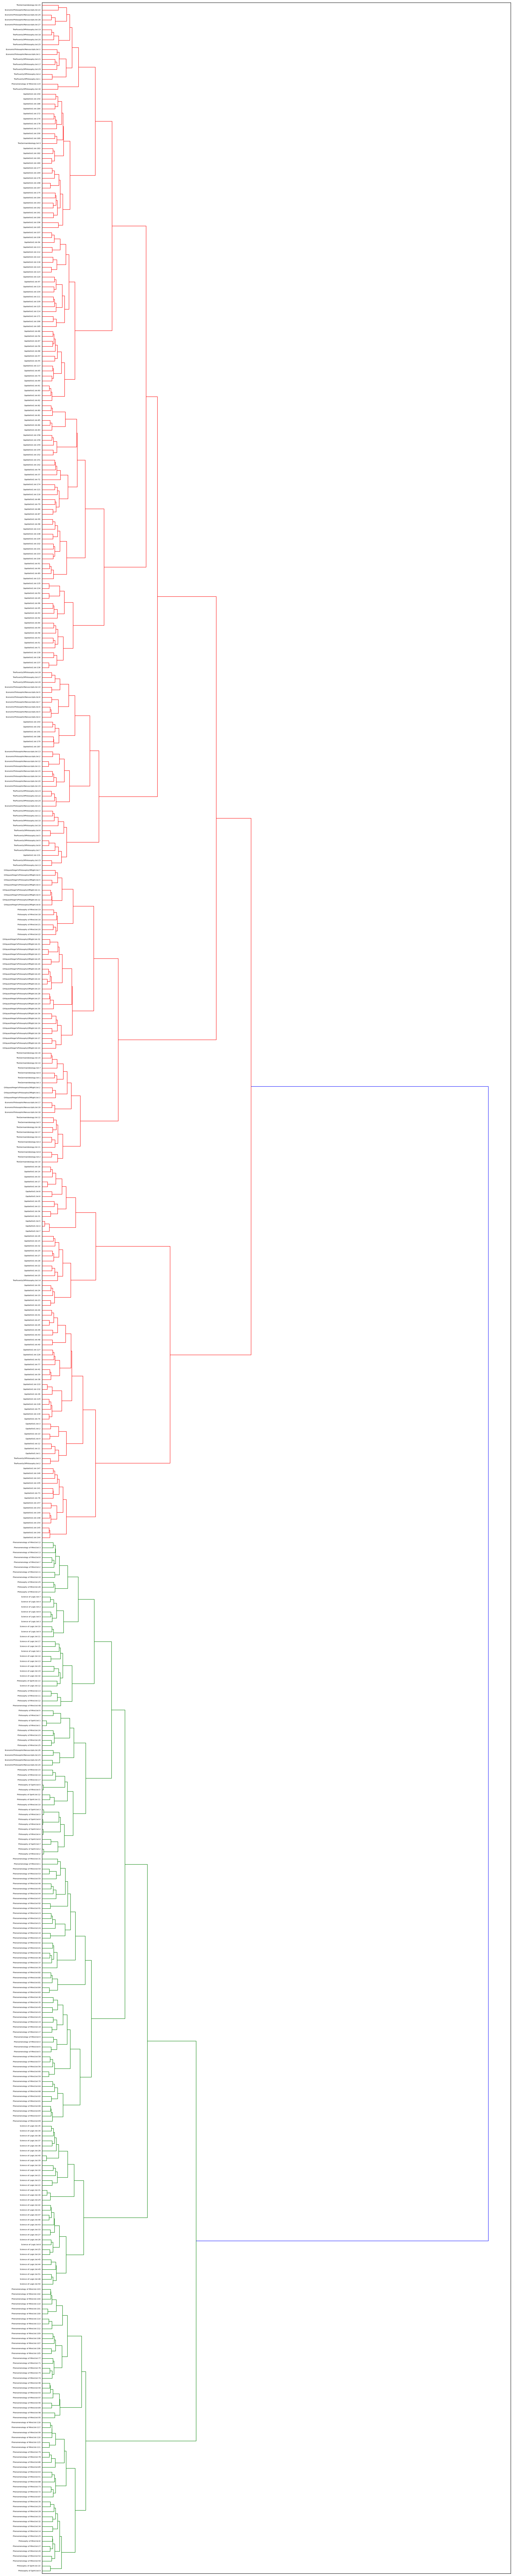

In [22]:
fig, ax = plt.subplots(figsize=(20, 100)) # set size
ax = dendrogram(dist_matrix, orientation="right", labels=ids);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout


### Doc2Vec

Using Gensim's Doc2Vec to generate feature vectors and word embeddings. 

In [14]:
import gensim
from gensim.models.doc2vec import TaggedDocument

Create a list where we will store the tagged documents. Convert text into form that gensim's doc2vec requires it in. 

In [28]:
taggeddoc=[]
text=[]

In [29]:
for i in range(len(books)):
    t=nltk.word_tokenize(books[i])
    text.append(t)
    td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(t))).split(),tags=[u'Doc_{:d}'.format(i)])
    taggeddoc.append(td)

Declaring out model. I have currently set the feature vector size to 200. We will change this and play around later. 

In [30]:
model = gensim.models.Doc2Vec(taggeddoc,alpha=0.025, size= 200, min_alpha=0.025, min_count=0)

Training the model. 

In [32]:
for epoch in range(20):
    if(epoch%5==0):
        print('Now training epoch %s'%epoch)
    model.train(taggeddoc,total_examples=model.corpus_count,epochs=model.iter)
    model.alpha -= 0.002 
    model.min_alpha = model.alpha  

Now training epoch 0
Now training epoch 5
Now training epoch 10
Now training epoch 15


Saving the model so that we do not have to train it every time we run the code. 

In [33]:
model.save('trained.model')
model.save_word2vec_format('trained.word2vec')

Loading the saved corpus. 

In [34]:
model = gensim.models.Doc2Vec.load('trained.model')

Storing the feature vectors in a numpy array and calculating the cosine similarity between docs. 

In [36]:
features=np.zeros((520,200))
for i in range(520):
    features[i]=model.docvecs[u'Doc_{:d}'.format(i)]
dist = 1 - cosine_similarity(features)
dist.shape

(520, 520)

K-Means clustering as seen above. The only difference being that we will be using the doc2vec features instead of tfidf vectors. 

In [37]:
num_of_clusters=10
kmeans=KMeans(n_clusters=num_of_clusters)
kmeans.fit(features)
clusters=kmeans.labels_.tolist()

In [38]:
documents = { 'title': ids,  'text': books, 'cluster': clusters }
documentFrame = pd.DataFrame(documents, index = [clusters])
documentFrame

,cluster,text,title
8,8,marxs critique hegels philosophy right 1843-...,CritiqueofHegel'sPhilosophyOfRight.txt-1
5,5,personal notion short long believed believe ju...,CritiqueofHegel'sPhilosophyOfRight.txt-2
5,5,war radical fact german history came grief the...,CritiqueofHegel'sPhilosophyOfRight.txt-3
8,8,critique hegel 's philosophy right society wit...,CritiqueofHegel'sPhilosophyOfRight.txt-4
8,8,way considering manner speaking there two-fold...,CritiqueofHegel'sPhilosophyOfRight.txt-5
8,8,element state nature real subject case politic...,CritiqueofHegel'sPhilosophyOfRight.txt-6
8,8,existing condition circumstance inasmuch actio...,CritiqueofHegel'sPhilosophyOfRight.txt-7
8,8,counsel actual arbitrary choice willkür in wor...,CritiqueofHegel'sPhilosophyOfRight.txt-8
8,8,arbitrary yet determinate decision sovereign p...,CritiqueofHegel'sPhilosophyOfRight.txt-9
8,8,rather two completely opposed concept sovereig...,CritiqueofHegel'sPhilosophyOfRight.txt-10


Visualizing the results using matplotlib after transforming it to 2 dimensions. 

In [39]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=7)
transformed = mds.fit_transform(dist)
x=transformed[:, 0]
y=transformed[:, 1]

In [40]:
num_colours=num_of_clusters
col=mpl.colors.cnames.items()
colours={}
random.seed(1)
i=0
while (i<num_of_clusters):
    c=random.choice(list(col))
    if(c[1] not in colours.keys()):
        colours[i]=c[1]
        i=i+1


cluster_names={}
for i in range(num_of_clusters):
    cluster_names[i]="Cluster-"+str(i)

In [41]:
df = pd.DataFrame(dict(x=x, y=y, label=clusters, title=ids)) 
groups = df.groupby('label')

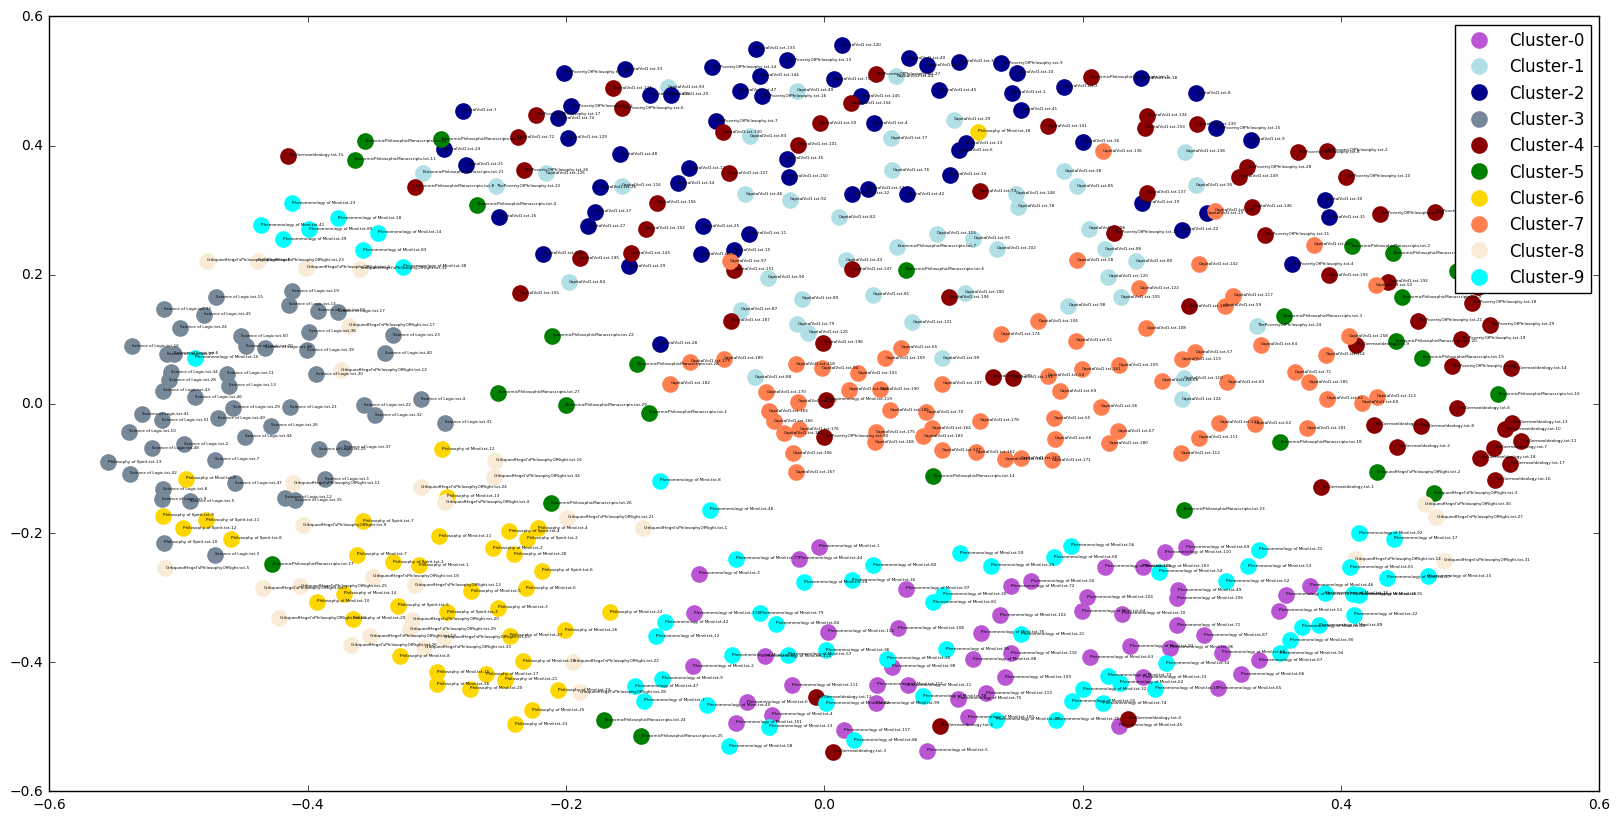

In [42]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10)) # set size
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=colours[name], 
            mec='none')
    
ax.legend(numpoints=1)  #show legend 

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=3)  

Ward's clustering. 

In [43]:
dist_matrix=ward(dist)

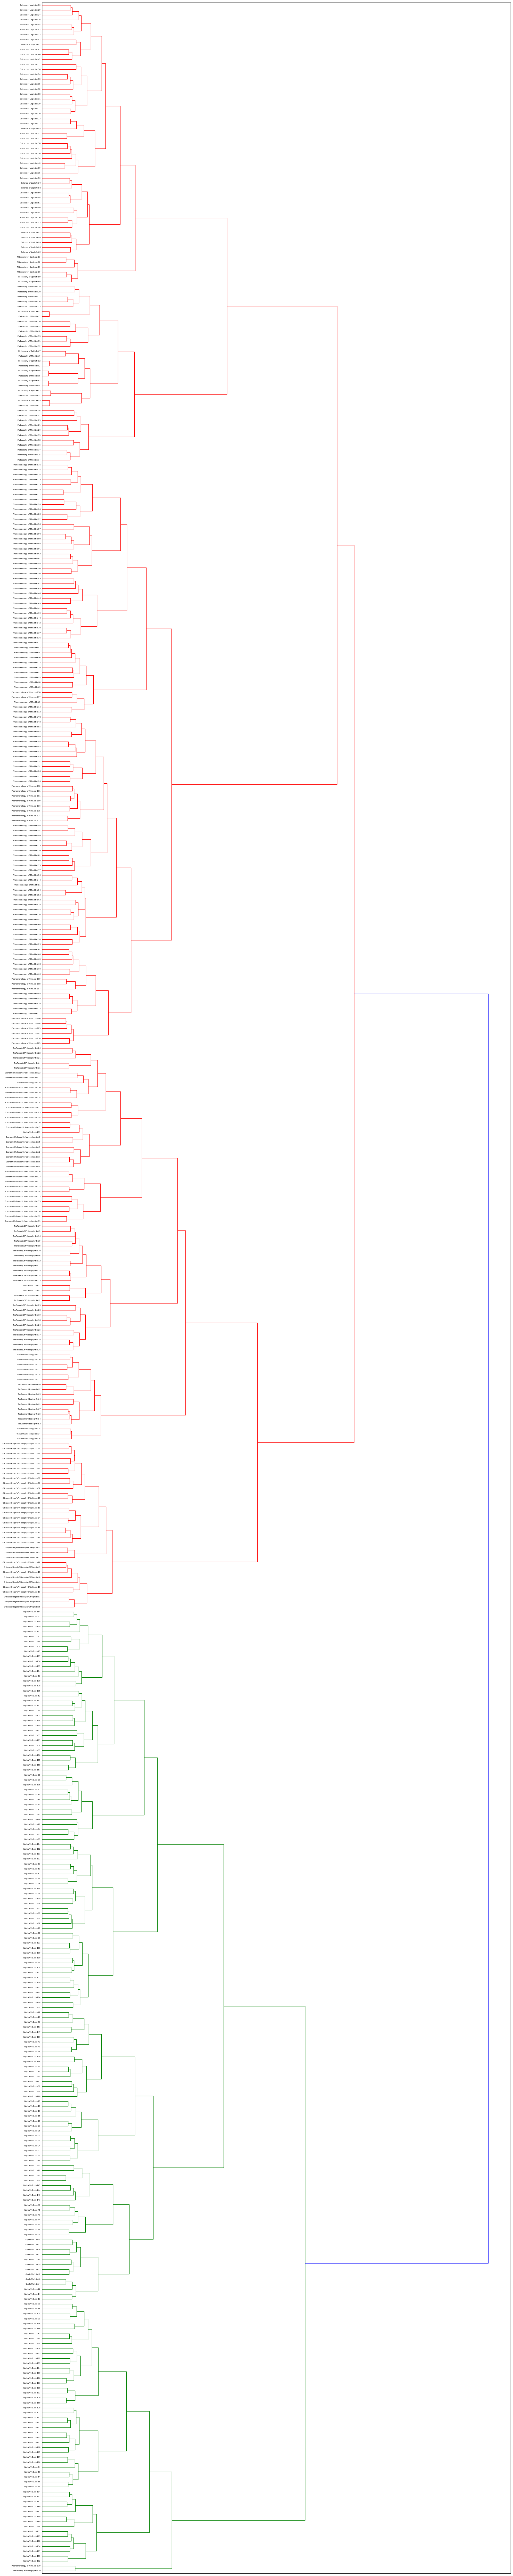

In [44]:
fig, ax = plt.subplots(figsize=(20, 100)) # set size
ax = dendrogram(dist_matrix, orientation="right", labels=ids);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout